In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Salary_Data_Based_country_and_race.csv')
df.head(10)

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian
5,5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0,USA,Hispanic
6,6,42.0,Female,Master's,Product Manager,12.0,120000.0,USA,Asian
7,7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0,China,Korean
8,8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0,China,Chinese
9,9,38.0,Male,PhD,Senior Scientist,10.0,110000.0,Australia,Australian


## PREPROCESSING

In [ ]:
df.shape

(6704, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6704 non-null   int64  
 1   Age                  6702 non-null   float64
 2   Gender               6702 non-null   object 
 3   Education Level      6701 non-null   object 
 4   Job Title            6702 non-null   object 
 5   Years of Experience  6701 non-null   float64
 6   Salary               6699 non-null   float64
 7   Country              6704 non-null   object 
 8   Race                 6704 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 471.5+ KB


Descriptive Statistics

In [ ]:
df.describe()

,Unnamed: 0,Age,Years of Experience,Salary
count,6704.000000,6702.000000,6701.000000,6699.000000
mean,3351.500000,33.620859,8.094687,115326.964771
std,1935.422435,7.614633,6.059003,52786.183911
min,0.000000,21.000000,0.000000,350.000000
25%,1675.750000,28.000000,3.000000,70000.000000
50%,3351.500000,32.000000,7.000000,115000.000000
75%,5027.250000,38.000000,12.000000,160000.000000
max,6703.000000,62.000000,34.000000,250000.000000


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5
Country,0
Race,0


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0
Country,0
Race,0


In [ ]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Education Level,object
Job Title,object
Years of Experience,float64
Salary,float64
Country,object
Race,object


In [ ]:
df.nunique()

,0
Age,41
Gender,3
Education Level,7
Job Title,191
Years of Experience,37
Salary,444
Country,5
Race,10



Grouping Job Titles

In [ ]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [ ]:
def categorize_job_title(job_title):
  job_title=str(job_title).lower()
  if 'software' in job_title or 'developer' in job_title:
    return 'Software/Developer'
  elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
  elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
  elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
  elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
  elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
  elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
  elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
  elif 'project manager' in job_title:
        return 'Project Manager'
  elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
  elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
  elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
  else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)


In [ ]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)


Grouping Education Level

In [ ]:
print(df['Education Level'].value_counts())

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


In [ ]:
def group_education(education):
    education = str(education).lower()

    if 'high school' in education:
        return 'High School'
    elif 'bachelor' in education:
        return 'Bachelors'
    elif 'master' in education:
        return 'Masters'
    elif 'phd' in education or 'ph.d' in education or 'doctorate' in education:
        return 'PhD'
    else:
        return 'Other'

df['Education Level'] = df['Education Level'].apply(group_education)

print(df['Education Level'].value_counts())

Education Level
Bachelors      3021
Masters        1860
PhD            1369
High School     448
Name: count, dtype: int64


In [ ]:
df['Education Level'].unique()

array(['PhD'], dtype=object)

In [ ]:
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian
5,29.0,Male,Bachelors,Data Analyst/Scientist,2.0,55000.0,USA,Hispanic
6,42.0,Female,Masters,Manager/Director/VP,12.0,120000.0,USA,Asian
7,31.0,Male,Bachelors,Manager/Director/VP,4.0,80000.0,China,Korean
8,26.0,Female,Bachelors,Marketing/Social Media,1.0,45000.0,China,Chinese
9,38.0,Male,PhD,Data Analyst/Scientist,10.0,110000.0,Australia,Australian


## EDA

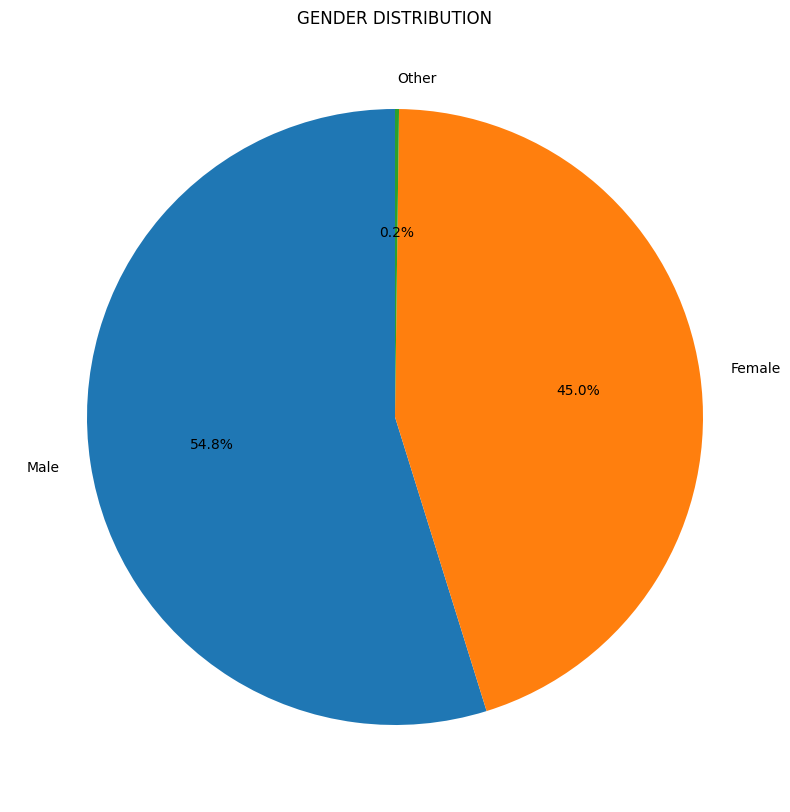

In [ ]:
#Pie chart for Gender
plt.figure(figsize=(10,10))
plt.pie(df['Gender'].value_counts(),labels=['Male','Female','Other'],autopct='%1.1f%%',startangle=90)
plt.title('GENDER DISTRIBUTION')
plt.show()

The piechart shows that majority of employees are male with 54.8% on the dataset,followed by females with 45% and 0.2% employees belong to other gender.

Text(0.5, 1.0, 'AGE DISTRIBUTION')

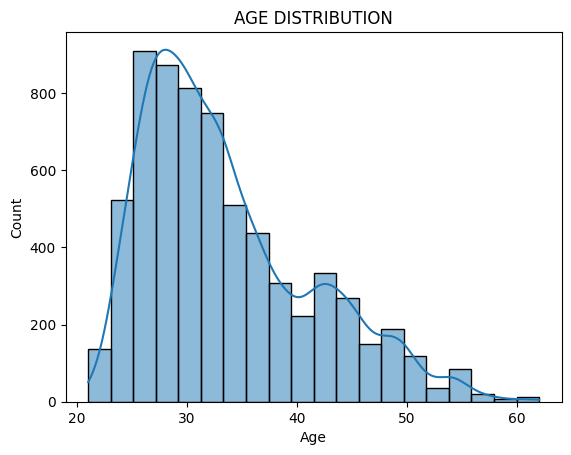

In [ ]:
#AGE DISTRIBUTION
sns.histplot(x='Age',data=df,bins=20,kde=True)
plt.title('AGE DISTRIBUTION')

Majority of the employees are in the range 25-35 years of age,which means majority employeesare young and energetic and there is only minimal number ofold employees in the dataset hving age mre than 55 years.

/tmp/ipython-input-67-3424909127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education Level',data=df,palette='Set1')


<Axes: xlabel='Education Level', ylabel='count'>

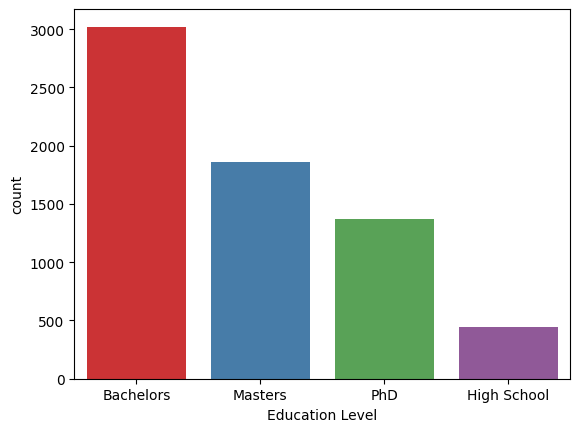

In [ ]:
# EDUCATION LEVEL
sns.countplot(x='Education Level',data=df,palette='Set1')

Most of the employees have a bachelors degree followed by Masters degree and phd.From the graph it is clear that most of the employees started working after graduation, few of them started working after post graduation and very few of them have gone for doctorate. The least number of employees have started working after high school education.

/tmp/ipython-input-69-1957285991.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Job Title',data=df,palette='Set2')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

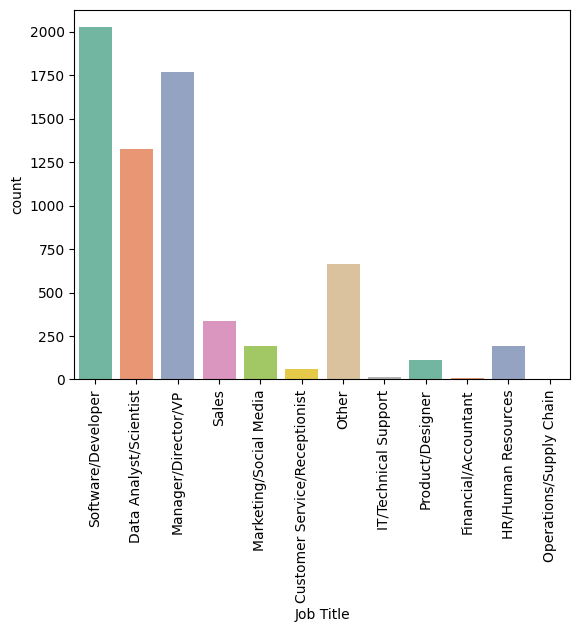

In [ ]:
#Job Title
sns.countplot(x='Job Title',data=df,palette='Set2')
plt.xticks(rotation=90)

 From the graph, it is clear that majority of the employees have job titles - Software Developer, Data Analyst/Scientist or Manager/Director/Vp. Few amount of employees have job titles such as sales, marketing/social media, HR, Product Designer and Customer Service. Very few of the eomployees work as a Financial/accountant or operation/supply management.

From this I build a hypothesis that the job titles such as Software Developer, Data Analyst/Scientist and Manager/Director are in more demand as compared to other job titles. It also means that job titles like Financial/accountant or operation/supply management and Customer Service are in less demand and paid comparatively less.

<Axes: xlabel='Years of Experience', ylabel='Count'>

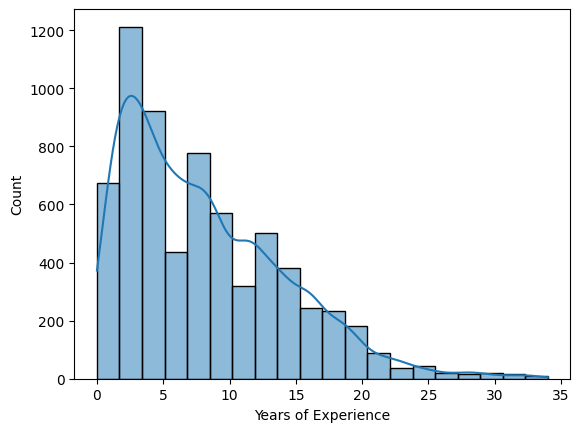

In [ ]:
# Years of Experience
sns.histplot(x='Years of Experience',data=df,bins=20,kde=True)

Most of the employees in the dataset havr experience of 0-7 years in the respective domains in which particularly majority of them have experience between less than 5 years. Moreover the number of employees in the dataset decreases with increasing number of years of experience.

/tmp/ipython-input-71-1776590311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country',data=df,palette='Set3')


<Axes: xlabel='Country', ylabel='count'>

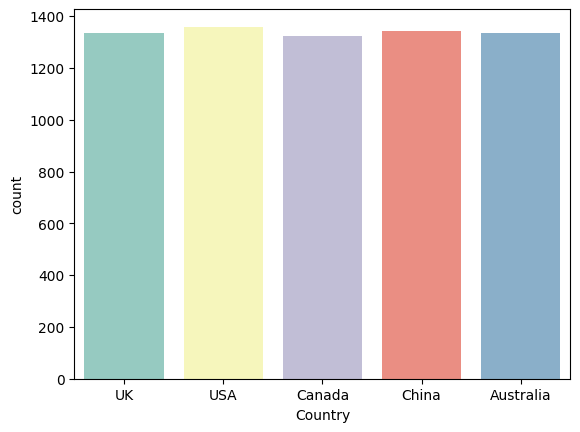

In [ ]:
#country
sns.countplot(x='Country',data=df,palette='Set3')


The number of employees from the above 5 countries is nearly same, with a little more in USA.

In [ ]:
#Racial Distribution

/tmp/ipython-input-75-889880867.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Race',data=df,palette='Set1')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Korean'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Australian'),
  Text(6, 0, 'Welsh'),
  Text(7, 0, 'African American'),
  Text(8, 0, 'Mixed'),
  Text(9, 0, 'Black')])

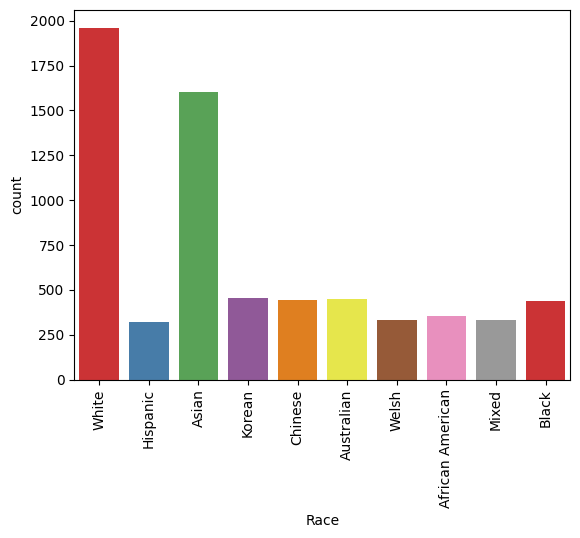

In [ ]:
sns.countplot(x='Race',data=df,palette='Set1')
plt.xticks(rotation=90)

From the graph, it is clear that most of the employees are either White or Asian, followed by Korean, Chinese, Australian and Black. Number of employees from Welsh, African American, Mixed and Hispanic race are less as compared to other groups.

Text(0.5, 1.0, 'AGE VS SALARY')

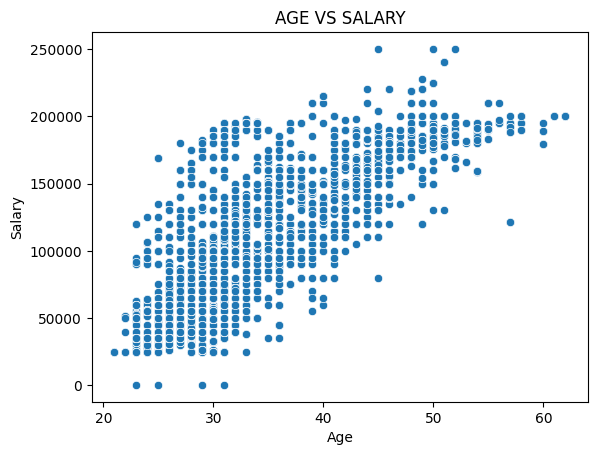

In [ ]:
#Age and Salary
sns.scatterplot(x='Age',y='Salary',data=df)
plt.title('AGE VS SALARY')

The salary of the person increases with increse in the age, which is obvious because of promotion and apprisals. However upon closer observation we can find that similar age have multiple salaries, which means there are other factors which decides the salary.

/tmp/ipython-input-80-71476934.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Gender',y='Salary',palette='Set1',data=df,ax=ax[0]).set_title('GENDER VS SALARY')
/tmp/ipython-input-80-71476934.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender',y='Salary',palette='Set1',data=df,ax=ax[1]).set_title('GENDER VS SALARY')


Text(0.5, 1.0, 'GENDER VS SALARY')

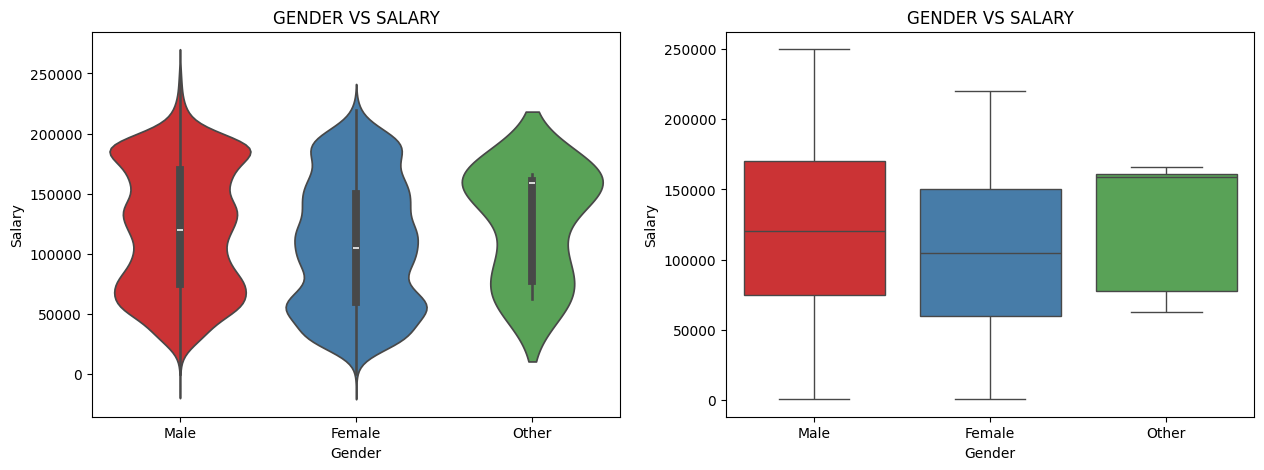

In [ ]:
#Gender and Salary
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x='Gender',y='Salary',palette='Set1',data=df,ax=ax[0]).set_title('GENDER VS SALARY')
sns.boxplot(x='Gender',y='Salary',palette='Set1',data=df,ax=ax[1]).set_title('GENDER VS SALARY')

The boxplot and violinplot describes the salary distribution among the three genders. In the boxplot the employees from Other gender has quite high salary as compared to Males and Females. The other gender employees have a median salary above 150000, followed by males with median salary near 107500 and females with median salary near 100000. The voilin plot visualizes the distribution of salary with respect to the gender, where most of the Other gender employees have salary above 150000. In males this distribution is concentrated between 50000 and 10000 as well as near 200000. In case of females, there salary distribution is quite spread as compared to other genders with most near 50000.

/tmp/ipython-input-81-132337859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education Level',y='Salary',palette='Set1',data=df,ax=ax[0]).set_title('EDUCATION LEVEL VS SALARY')
/tmp/ipython-input-81-132337859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education Level',y='Salary',palette='Set1',data=df,ax=ax[1]).set_title('EDUCATION LEVEL VS SALARY')


Text(0.5, 1.0, 'EDUCATION LEVEL VS SALARY')

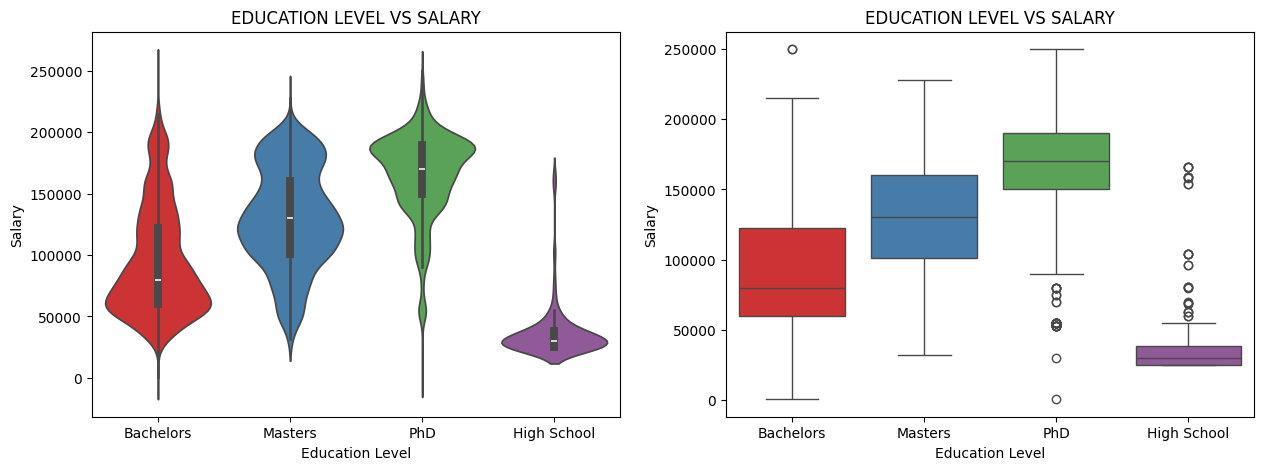

In [ ]:
#Education Level and Salary
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x='Education Level',y='Salary',palette='Set1',data=df,ax=ax[0]).set_title('EDUCATION LEVEL VS SALARY')
sns.boxplot(x='Education Level',y='Salary',palette='Set1',data=df,ax=ax[1]).set_title('EDUCATION LEVEL VS SALARY')

he boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

/tmp/ipython-input-83-3838956178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job Title',y='Salary',data=df,palette='Set1')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Software/Developer'),
  Text(1, 0, 'Data Analyst/Scientist'),
  Text(2, 0, 'Manager/Director/VP'),
  Text(3, 0, 'Sales'),
  Text(4, 0, 'Marketing/Social Media'),
  Text(5, 0, 'Customer Service/Receptionist'),
  Text(6, 0, 'Other'),
  Text(7, 0, 'IT/Technical Support'),
  Text(8, 0, 'Product/Designer'),
  Text(9, 0, 'Financial/Accountant'),
  Text(10, 0, 'HR/Human Resources'),
  Text(11, 0, 'Operations/Supply Chain')])

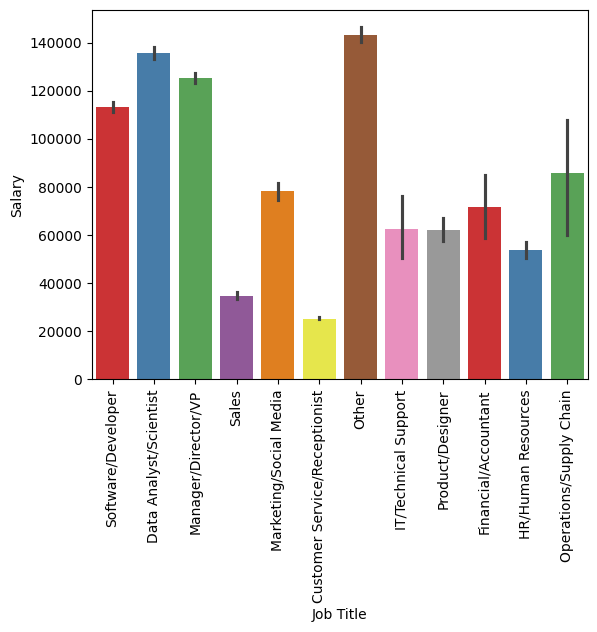

In [ ]:
#Job Title and Salary
sns.barplot(x='Job Title',y='Salary',data=df,palette='Set1')
plt.xticks(rotation=90)

he boxplot and violinplot shows the distribution of salary based on the employees education level. The median salary for the Phd holders is highest followed by Masters and bachelors degreee holders, with employees with no degree having the lowest median salary. In the violinplot the phd scholars have distribution near 200000, whereas Masters degree holders have a very sleak distribution where the salary distribution is spread from 100k to 150k, The Bachelors degree holders have a salary distribution near 50000 whereas the employees with no degree have a salary distribution near 40k-45k.

From these graph, I assume that the employees with higher education level have higher salary than the employees with lower education level.

Text(0.5, 1.0, 'EXPERIENCE VS SALARY')

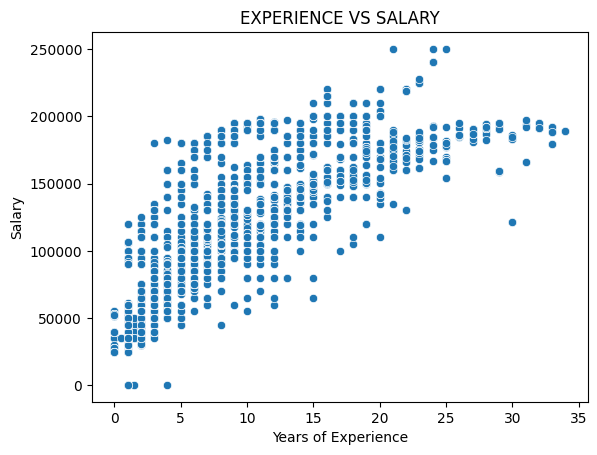

In [ ]:
#Experience and Salary
sns.scatterplot(x='Years of Experience',y='Salary',data=df).set_title('EXPERIENCE VS SALARY')

From this scaaterplot, it is clear that on the whole, the salary of the employees is increasing with the years of experience. However, on closer look we can see that similar experience have different salaries. This is because the salary is also dependent on other factors like job title, age, gender education level as discussed earlier.

/tmp/ipython-input-87-1875746206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Country',y='Salary',palette='Set1',data=df,ax=ax[0]).set_title('COUNTRY VS SALARY')
/tmp/ipython-input-87-1875746206.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country',y='Salary',palette='Set1',data=df,ax=ax[1]).set_title('COUNTRY VS SALARY')


Text(0.5, 1.0, 'COUNTRY VS SALARY')

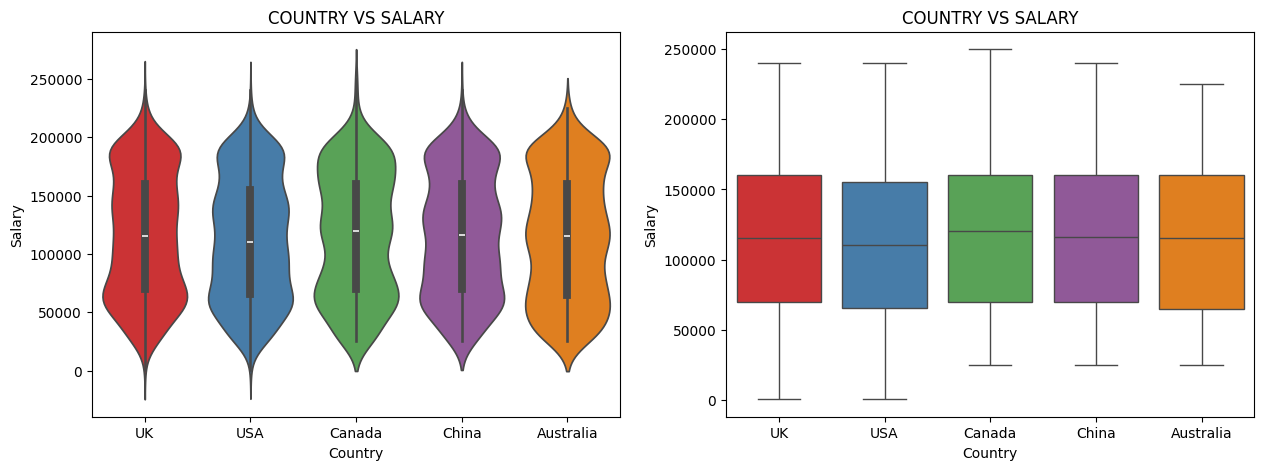

In [ ]:
#Country and Salary
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x='Country',y='Salary',palette='Set1',data=df,ax=ax[0]).set_title('COUNTRY VS SALARY')
sns.boxplot(x='Country',y='Salary',palette='Set1',data=df,ax=ax[1]).set_title('COUNTRY VS SALARY')

Both the boxplot and violinplot shows very similar insight about the salary across all the countiries even in the violinplot distribution. However, there is very small variation in median salary in USA, which is slighlty less as compared to other countries.

Since, the we cannot get much information about the salary with respect to the countries. So, I will plot the job title vs salary graph for each country, so that we can get a overview of job title vs salary for each country.

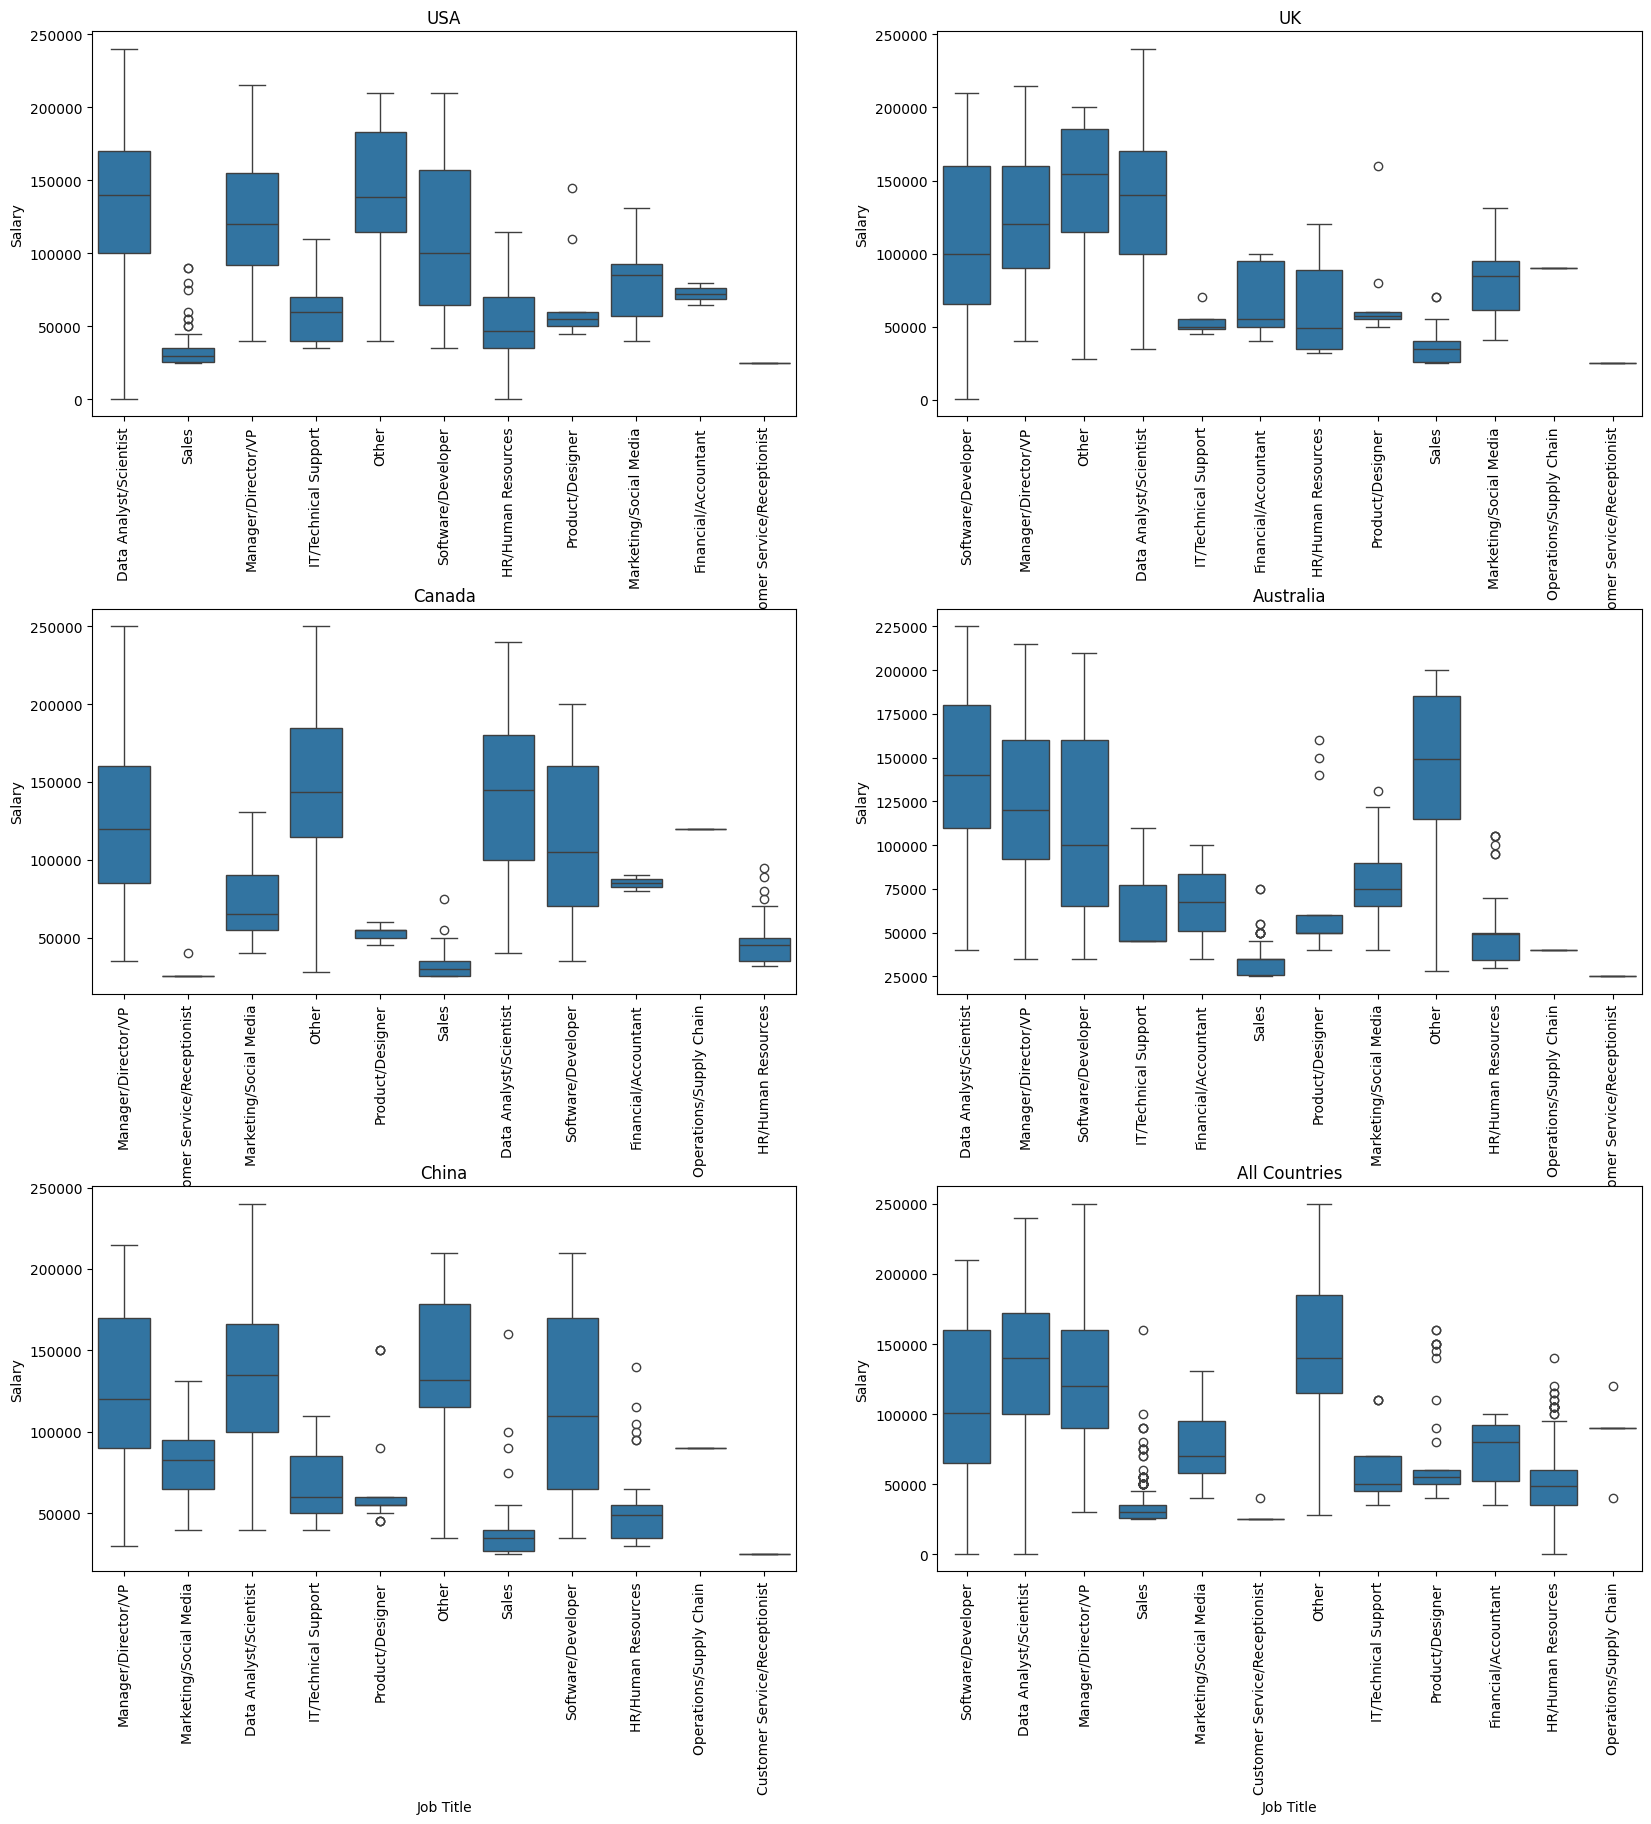

In [ ]:
fig,ax=plt.subplots(3,2,figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
sns.boxplot(x='Job Title',y='Salary',data=df[df['Country']=='USA'],ax=ax[0,0]).set_title('USA')
ax[0,0].tick_params(axis='x',rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'UK'], ax = ax[0,1]).set_title('UK')
ax[0,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Canada'], ax = ax[1,0]).set_title('Canada')
ax[1,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'Australia'], ax = ax[1,1]).set_title('Australia')
ax[1,1].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df[df['Country'] == 'China'], ax = ax[2,0]).set_title('China')
ax[2,0].tick_params(axis='x', rotation=90)
sns.boxplot(x = 'Job Title', y = 'Salary', data = df, ax = ax[2,1]).set_title('All Countries')
ax[2,1].tick_params(axis='x', rotation=90)


After observing all these plots, I conclude that the Job Titles such as Softwarre Developer, Manager/Director/VP and Data Analyst/Scientist hare in high demand as well as receive much higer salary than other job titles, excluding the Job Titles that come under 'Other' category. The job titles such as Operation/Supply Chain, Customer Service/Receptionist, Product Designer and sales are in low demand and have low salary.

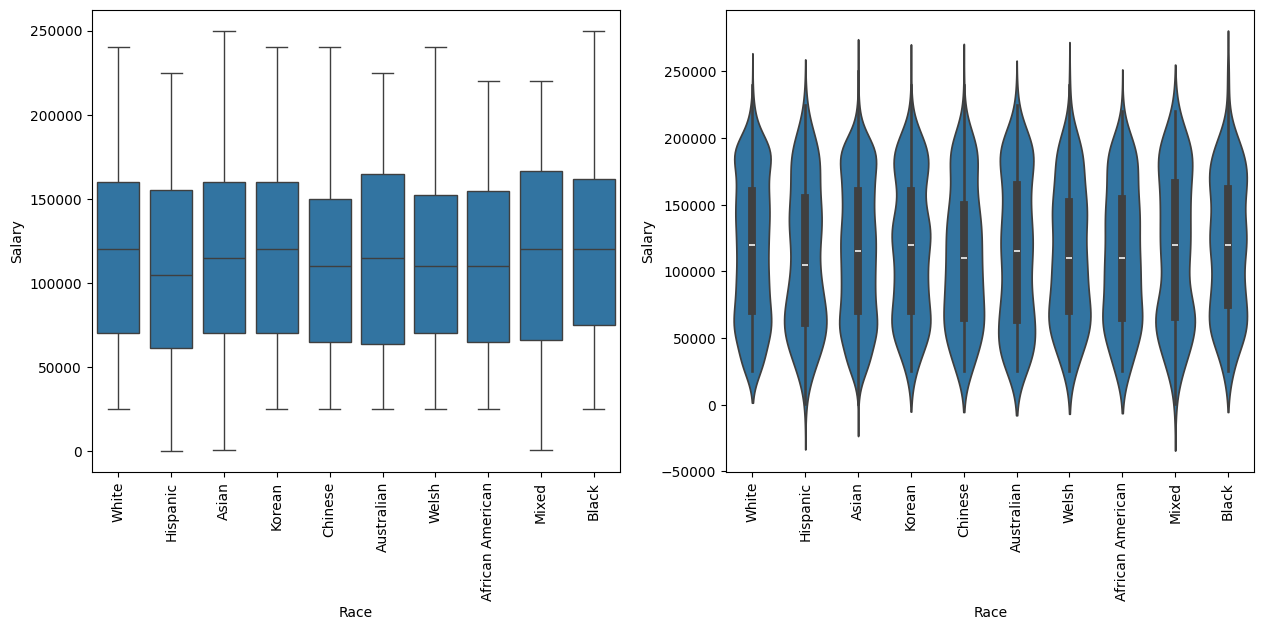

In [ ]:
#Race and Salary

fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Race', y = 'Salary', data = df, ax = ax[0])
ax[0].tick_params(axis='x', rotation=90)
sns.violinplot(x = 'Race', y ='Salary', data = df, ax = ax[1])
ax[1].tick_params(axis='x', rotation=90)

The employees from the races - Australian, Mixed, Blacks and White have the highest median salary, followed by Asian, Korean and Chinese with lowest median salary in employees from hispanic race. Looking at the violinplot the salary distribution is more concentrated after 150k in white, australian, black and mixed race. Whereas the hispanic has more concentration near 75k

## Data Preprocessing 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
features=['Gender','Country','Education Level','Job Title','Race']
le=LabelEncoder()
for feature in features:
  le.fit(df[feature].unique())
  df[feature]=le.transform(df[feature])
  print(feature,df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


In [ ]:
#Normalization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age','Years of Experience','Salary']]=scaler.fit_transform(df[['Age','Years of Experience','Salary']])

## Coorelation Matrix Heatmap

<Axes: >

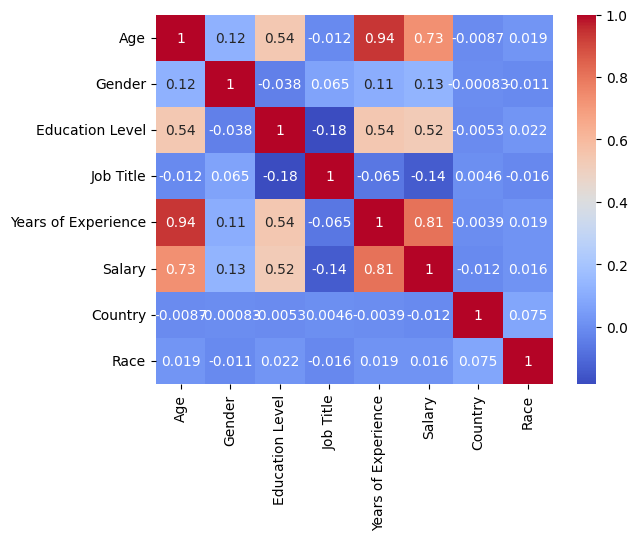

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In this coorelation matrix, there are three major coorealtions.


*   Salary and Age
*   Salary and Years of Experience
*   Years of Experience and Age

The coorelation salary with age and years of experience is already explored in the above plots. The coorelation between the years of experience and age is obvious as the person ages the experience will be more.

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Salary',axis=1),df['Salary'],test_size=0.2,random_state=42)


## Salary Prediction


I will be using the following models:


*  Decision Tree Regressor
*  Random Forest Regressor





## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()

Hypertuning the model

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters={'max_depth':[2,4,6,8,10],
            'min_samples_split':[2,4,6,8],
            'min_samples_leaf':[2,4,6,8],
            'max_features':['auto','sqrt','log2'],
            'random_state':[0,42]}
grid_search=GridSearchCV(dtree,parameters,cv=5,scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

In [ ]:
dtree=DecisionTreeRegressor(max_depth=10, max_features= 'sqrt', min_samples_leaf=2, min_samples_split= 6, random_state= 0)
dtree

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [ ]:
dtree.score(x_train,y_train)


0.9026424070583517

In [ ]:
dtree_pred=dtree.predict(x_test)

## Evaluating the Decision Tree Regressor Model

In [ ]:
dft=pd.DataFrame({'Actual_yvalue':y_test,'Predicted_yvalue':dtree_pred})
dft

,Actual_yvalue,Predicted_yvalue
1883,0.656819,0.330758
2630,-0.745659,-0.730151
498,-0.290405,-0.290405
5973,-1.048183,-1.033611
4108,-0.669294,-0.373575
...,...,...
2830,-0.797775,-0.725095
6154,-0.953461,-1.009433
4940,-0.195682,-0.433841
135,-1.142906,0.330758


/tmp/ipython-input-119-1152829571.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dft['Actual_yvalue'],color='green',hist=False,kde=True,label='Actual')
/tmp/ipython-input-119-1152829571.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dft['Predicted_yvalue'],color='r

<Axes: xlabel='Predicted_yvalue', ylabel='Density'>

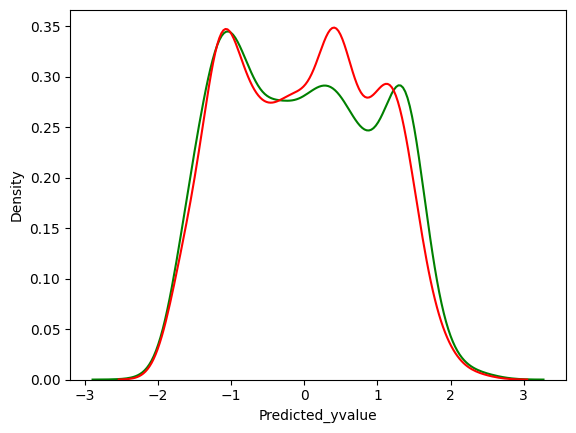

In [ ]:
ax=sns.distplot(dft['Actual_yvalue'],color='green',hist=False,kde=True,label='Actual')
sns.distplot(dft['Predicted_yvalue'],color='red',ax=ax,hist=False,kde=True,label='pred')

In [ ]:
from sklearn.metrics import root_mean_squared_error,r2_score,mean_squared_error,mean_absolute_error
print('MSE:',mean_squared_error(y_test,dtree_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,dtree_pred)))
print('MAE:',mean_absolute_error(y_test,dtree_pred))
print('R2 SCORE:',r2_score(y_test,dtree_pred))

MSE: 0.11972398748602252
RMSE: 0.346011542417334
MAE: 0.22124965078028738
R2 SCORE: 0.8830099115541592


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
rf.score(x_train,y_train)

0.9880688054675231

In [ ]:
rf_pred=rf.predict(x_test)

## Evaluating Random Forest Regressor Model

In [ ]:
dfr=pd.DataFrame({'Actual_yvalue':y_test,'Predicted_yvalue':rf_pred})
dfr

,Actual_yvalue,Predicted_yvalue
1883,0.656819,0.640165
2630,-0.745659,-0.732027
498,-0.290405,-0.290405
5973,-1.048183,-1.049383
4108,-0.669294,-0.637483
...,...,...
2830,-0.797775,-0.724104
6154,-0.953461,-1.016526
4940,-0.195682,-0.197577
135,-1.142906,0.297945


/tmp/ipython-input-127-3490675993.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dfr['Actual_yvalue'],color='green',hist=False,kde=True,label='Actual')
/tmp/ipython-input-127-3490675993.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfr['Predicted_yvalue'],color='r

<Axes: xlabel='Predicted_yvalue', ylabel='Density'>

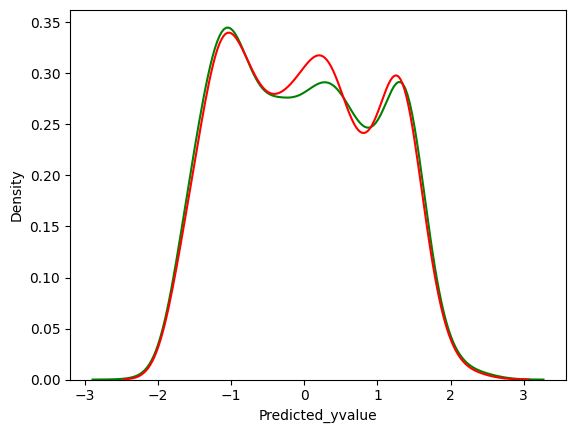

In [ ]:
ax=sns.distplot(dfr['Actual_yvalue'],color='green',hist=False,kde=True,label='Actual')
sns.distplot(dfr['Predicted_yvalue'],color='red',hist=False,kde=True,label='Predicted',ax=ax)

In [ ]:
print("R2 Score: ", r2_score(y_test, rf_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, rf_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))

R2 Score:  0.9468767155786619
Mean Squared Error:  0.054364703230573616
Mean Absolute Error:  0.1146422930766439
RMSE: 0.23316239669074776


## CONCLUSION

From the exploratory data analysis, I have concluded that the salary of the employees is dependent upon the following factors:

1.   Years of Experience
2.   Job Title
1.   Education Level


Employees with greater years of experience, having job title such as Data analyst/scientist, Software Developer or Director/Manager/VP and having a Master's or Doctoral degree are more likely to have a higher salary.

Coming to the machine learning models, I have used regressor models - Decision Tree Regressor and Random Forest Regressor for predicting the salary. The Random Forest Regressor has performed well with the accuracy of 94.6%